#### ABOUT
The dataset used below is taken from 'www.kaggle.com'. It consists of information about the various restraunts across the city (Bengaluru, India). The information itself was obtained from Zomato app, which is an online food delivering app, so we have the customer ratings and reviews as well as the contact details of the restaurants available.

#### Import the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('zomato.csv')
df.head(5)

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [5]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.head(5)

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
df.describe()

votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

#### Find the columns having null values

<AxesSubplot:>

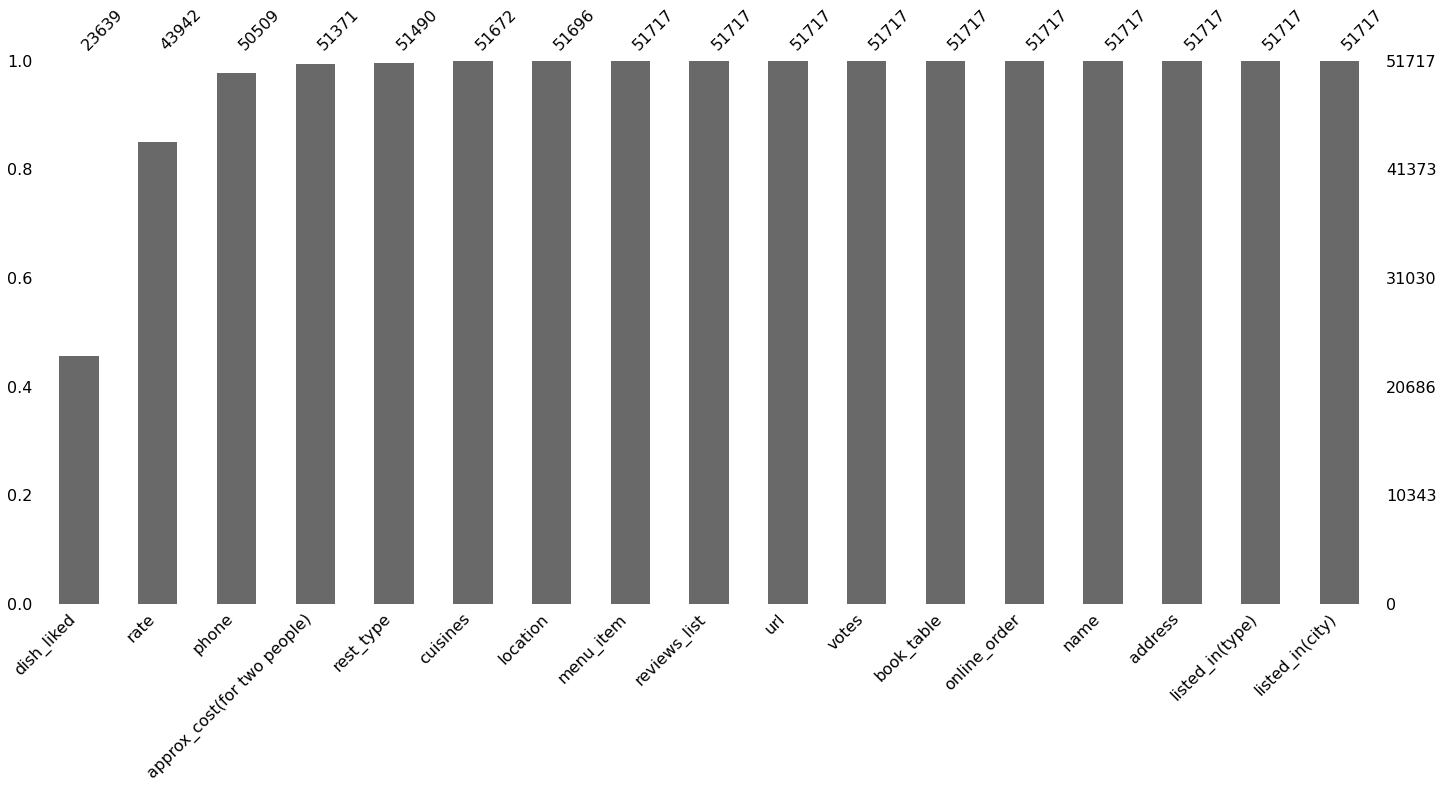

In [10]:
msno.bar(df,sort='ascending')

In [11]:
threshold=len(df)*0.1  # Taking 10% of the total rows as threshold to check if any column consists of null values less than the theshold no. of rows
threshold

5171.700000000001

In [12]:
df.dropna(thresh=threshold,axis=1,inplace=True)

In [13]:
df.head(5)

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [14]:
# Although 'address','dish_liked','menu_item' has null values but I will not be considering them in my analysis, so I can delete them.
df.drop(labels=['address','dish_liked','menu_item'],axis=1,inplace=True)

#### DATA CLEANING

#### 1. Rate

In [15]:
df['rate']=df['rate'].apply(lambda r:str(r).split('/'))

In [16]:
len(df['rate'][0])

2

In [17]:
def rate(x):
    for i in range(len(x)):
        return x[0]  

In [18]:
df['rating']=df['rate'].apply(rate)

In [19]:
df['rating']=df['rating'].str.strip(' ')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

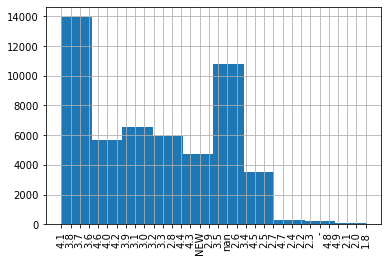

In [20]:
df['rating'].hist()
plt.xticks(rotation=90)

In [21]:
df['rating']=df['rating'].str.replace('NEW','0')
df['rating']=df['rating'].str.replace('-','NaN')
df['rating']=df['rating'].str.replace('nan','NaN')

In [22]:
df['rating'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '0', '2.9', '3.5', 'NaN',
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [23]:
df['rating']=df['rating'].apply(lambda x: float(x))

In [24]:
def inpute_mean(series):
    return series.fillna(series.mean())

In [25]:
df['rating']=df['rating'].transform(inpute_mean)

In [26]:
df['rating']=df['rating'].round(1)

In [27]:
df['rating'].isnull().sum()

0

#### 2. Phone

In [28]:
df.drop(labels=['phone'],axis=1,inplace=True)

#### 3.  Approx. Cost 

In [29]:
df['approx_cost(for two people)'].isnull().sum()

346

In [30]:
df['approx_cost']=df['approx_cost(for two people)'].str.replace(',','')

<AxesSubplot:>

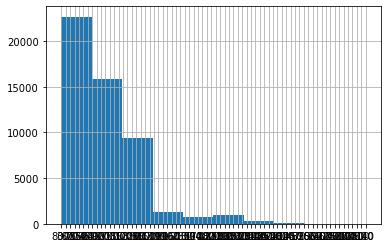

In [31]:
df['approx_cost'].hist()

In [32]:
df['approx_cost']=df['approx_cost'].apply(lambda x: float(x))

In [33]:
df['approx_cost']=df['approx_cost'].transform(inpute_mean)

In [34]:
df['approx_cost']=df['approx_cost'].apply(lambda x: int(x))

In [35]:
df['approx_cost'].isnull().sum()

0

#### 4. Rest_Type

In [36]:
df['rest_type']

0                        Casual Dining
1                        Casual Dining
2                  Cafe, Casual Dining
3                          Quick Bites
4                        Casual Dining
5                        Casual Dining
6                        Casual Dining
7                  Casual Dining, Cafe
8                                 Cafe
9                                 Cafe
10                                Cafe
11                                Cafe
12                                Cafe
13                                Cafe
14                 Cafe, Casual Dining
15                                Cafe
16                                Cafe
17                                Cafe
18                                Cafe
19                                Cafe
20                                Cafe
21                                Cafe
22                                Cafe
23                   Quick Bites, Cafe
24                                Cafe
25                       

In [37]:
df['Rest_Type']=df['rest_type'].apply(lambda r:str(r).split(', '))

In [38]:
def rest(r):
    p=""
    if 'Dessert Parlor' in r:
        return 'Dessert Parlor'
    if 'Cafe' in r:
        return 'Cafe'
    if 'Takeaway' in r or 'Delivery' in r :
        return 'Takeaway'
    if  'Casual Dining' in r:
        return 'Casual Dining'
    if 'Fine Dining' in r:
        return 'Fine Dining'
    if 'Microbrewery' in r:
        return 'Microbrewery'
    if 'Quick Bites' in r:
        return 'Quick Bites'
    if 'Food Court' in r:
        return 'Food Court'
    if 'Lounge' in r:
        return 'Lounge'
    if 'Bakery' in r:
        return 'Bakery'
    if 'Pub' in r:
        return 'Pub'
    else:
        for i in range(len(r)):
            p=p+r[i]
        return p

In [39]:
df['Rest_Type']=df['Rest_Type'].apply(rest)

In [40]:
df['Rest_Type'].unique()

array(['Casual Dining', 'Cafe', 'Quick Bites', 'Takeaway', 'Mess',
       'Dessert Parlor', 'Pub', 'Bakery', 'Fine Dining', 'Beverage Shop',
       'Sweet Shop', 'Bar', 'Confectionery', 'Kiosk', 'Food Truck',
       'Lounge', 'Food Court', 'nan', 'Dhaba', 'Microbrewery', 'Club',
       'Bhojanalya', 'Pop Up'], dtype=object)

In [41]:
df['Rest_Type'].fillna(str(df['Rest_Type'].mode().values[0]), inplace=True)

In [42]:
df['Rest_Type'].mode()

0    Quick Bites
dtype: object

#### 5. Cuisine

In [43]:
df['Cuisine']=df['cuisines'].apply(lambda s:str(s).split(', '))

In [44]:
df['Cuisine']

0                         [North Indian, Mughlai, Chinese]
1                            [Chinese, North Indian, Thai]
2                                 [Cafe, Mexican, Italian]
3                             [South Indian, North Indian]
4                               [North Indian, Rajasthani]
5                                           [North Indian]
6            [North Indian, South Indian, Andhra, Chinese]
7                                   [Pizza, Cafe, Italian]
8                             [Cafe, Italian, Continental]
9               [Cafe, Mexican, Italian, Momos, Beverages]
10                                                  [Cafe]
11                            [Cafe, Italian, Continental]
12                   [Cafe, Chinese, Continental, Italian]
13                                     [Cafe, Continental]
14                                [Cafe, Mexican, Italian]
15                                                  [Cafe]
16          [Cafe, Fast Food, Continental, Chinese, Momo

In [45]:
ex=df['Cuisine'].explode().value_counts()

In [46]:
ex

North Indian        21085
Chinese             15547
South Indian         8644
Fast Food            8096
Biryani              6492
Continental          5765
Desserts             5633
Cafe                 5303
Beverages            4747
Italian              3389
Bakery               2840
Street Food          2595
Pizza                2073
Burger               2009
Seafood              1810
Ice Cream            1774
Andhra               1760
Mughlai              1570
Rolls                1470
American             1461
Kerala               1454
Asian                1295
Momos                1276
Finger Food          1219
Juices               1144
Salad                1138
Arabian              1099
Kebab                1036
Mithai               1027
Thai                 1000
Healthy Food          917
Sandwich              877
BBQ                   736
European              715
Mangalorean           688
Bengali               575
Steak                 573
Mediterranean         555
Mexican     

In [47]:
df['Cuisine'].fillna(str(ex.mode().values[0]), inplace=True)

In [48]:
df['Cuisine'].isnull().sum()

0

#### 6. Location

In [49]:
df['Location']=df['location'].fillna(df['listed_in(city)'])

In [50]:
df['Location'].isnull().sum()

0

In [51]:
df.drop(labels=['rate','rest_type','cuisines','approx_cost(for two people)','location'],axis=1,inplace=True)

In [52]:
df.head(5).columns

Index(['url', 'name', 'online_order', 'book_table', 'votes', 'reviews_list',
       'listed_in(type)', 'listed_in(city)', 'rating', 'approx_cost',
       'Rest_Type', 'Cuisine', 'Location'],
      dtype='object')

In [53]:
col=['name','url','Location','listed_in(city)','listed_in(type)','Rest_Type','Cuisine', 'approx_cost','online_order','book_table','votes','rating','reviews_list']

In [54]:
df=df[col]

In [55]:
df.isnull().sum()

name               0
url                0
Location           0
listed_in(city)    0
listed_in(type)    0
Rest_Type          0
Cuisine            0
approx_cost        0
online_order       0
book_table         0
votes              0
rating             0
reviews_list       0
dtype: int64

#### DATA VISUALIZATION

In [56]:
df.head(2)

name                                                url  \
0           Jalsa  https://www.zomato.com/bangalore/jalsa-banasha...   
1  Spice Elephant  https://www.zomato.com/bangalore/spice-elephan...   

       Location listed_in(city) listed_in(type)      Rest_Type  \
0  Banashankari    Banashankari          Buffet  Casual Dining   
1  Banashankari    Banashankari          Buffet  Casual Dining   

                            Cuisine  approx_cost online_order book_table  \
0  [North Indian, Mughlai, Chinese]          800          Yes        Yes   
1     [Chinese, North Indian, Thai]          800          Yes         No   

   votes  rating                                       reviews_list  
0    775     4.1  [('Rated 4.0', 'RATED\n  A beautiful place to ...  
1    787     4.1  [('Rated 4.0', 'RATED\n  Had been here for din...

1. Check the Number of restaurants at various locations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Bannerghatta Road'),
  Text(2, 0, 'Basavanagudi'),
  Text(3, 0, 'Bellandur'),
  Text(4, 0, 'Brigade Road'),
  Text(5, 0, 'Brookefield'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Church Street'),
  Text(8, 0, 'Electronic City'),
  Text(9, 0, 'Frazer Town'),
  Text(10, 0, 'HSR'),
  Text(11, 0, 'Indiranagar'),
  Text(12, 0, 'Jayanagar'),
  Text(13, 0, 'JP Nagar'),
  Text(14, 0, 'Kalyan Nagar'),
  Text(15, 0, 'Kammanahalli'),
  Text(16, 0, 'Koramangala 4th Block'),
  Text(17, 0, 'Koramangala 5th Block'),
  Text(18, 0, 'Koramangala 6th Block'),
  Text(19, 0, 'Koramangala 7th Block'),
  Text(20, 0, 'Lavelle Road'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Marathahalli'),
  Text(23, 0, 'MG Road'),
  Text(24, 0, 'New BEL Road'),
  Text(25, 0, 'Old Airport Road'),
  Text(26, 0, 'Rajajinagar'),
  Text(27, 0, 'Residenc

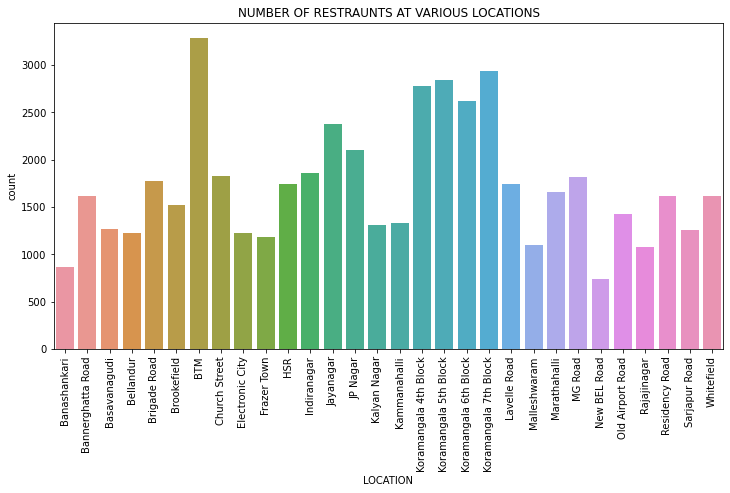

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(df['listed_in(city)'])
plt.title('NUMBER OF RESTRAUNTS AT VARIOUS LOCATIONS')
plt.xlabel('LOCATION')
plt.xticks(rotation=90)

2. Check for the locations having highly rated or good restaurants.

In [58]:
grp1=df.groupby(['listed_in(city)'])
r1=grp1['rating'].agg(np.mean)
c1=grp1['approx_cost'].agg(np.mean)
r1=r1.sort_values(ascending=True)
c1=c1.sort_values(ascending=True)

Text(0, 0.5, 'RATING')

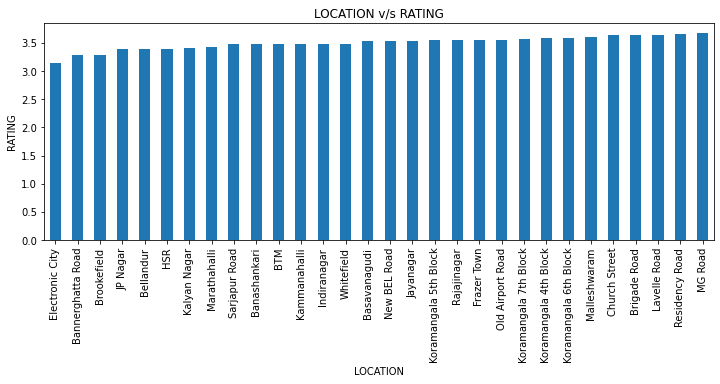

In [59]:
plt.figure(figsize=(12,4))
r1.plot.bar()
plt.title('LOCATION v/s RATING')
plt.xlabel('LOCATION')
plt.ylabel('RATING')

3. Find locations where the restaurants are reatively cheap or within budget.

Text(0, 0.5, 'APPROX_COST(FOR TWO PERSONS)')

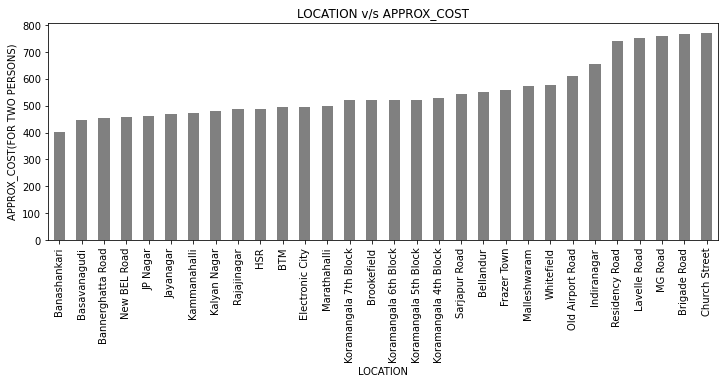

In [60]:
plt.figure(figsize=(12,4))
c1.plot.bar(color='grey')
plt.title('LOCATION v/s APPROX_COST')
plt.xlabel('LOCATION')
plt.ylabel('APPROX_COST(FOR TWO PERSONS)')

4. Find locations which has highly voted restaurants with advance booking options

Text(0, 0.5, 'VOTES')

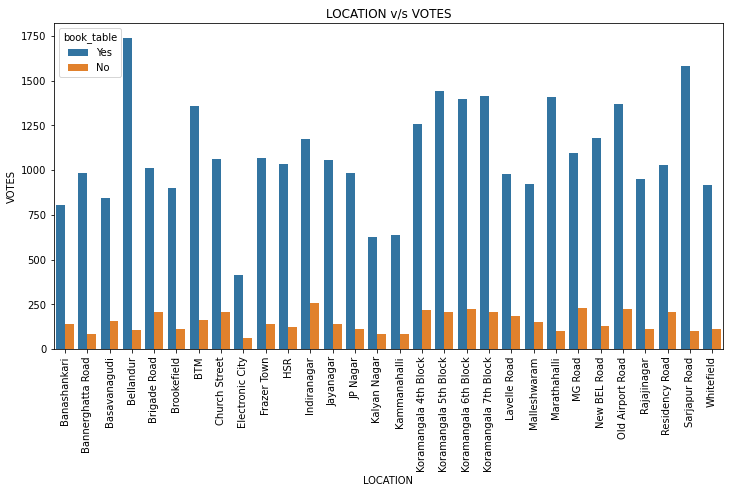

In [61]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(x=df['listed_in(city)'],y=df['votes'],hue=df['book_table'],ci=None)
plt.title('LOCATION v/s VOTES')
plt.xlabel('LOCATION')
plt.ylabel('VOTES')

In [62]:
grp3=df.groupby(['name'])
l3=grp3['approx_cost'].agg(np.mean)
r3=grp3['rating'].agg(np.mean)

In [63]:
df['name'].value_counts().head(10)

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Chef Baker's         62
Name: name, dtype: int64

5. Find locations which has 'Cafe Coffee Day' and a high rating with onine ordering option available

In [64]:
x1=df[df['name']=='Cafe Coffee Day']

Text(0, 0.5, 'RATING')

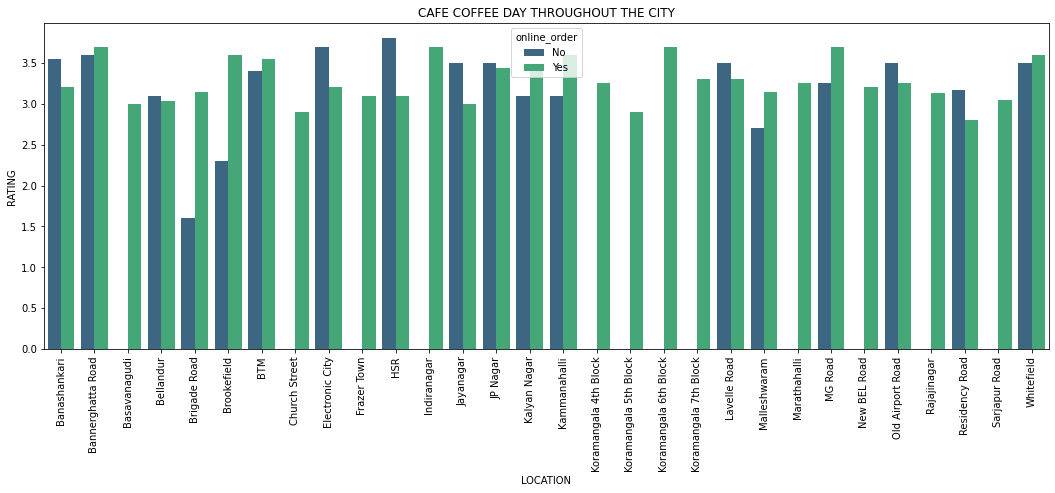

In [65]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
sns.barplot(x=x1['listed_in(city)'],y=x1['rating'],hue=x1['online_order'],ci=None,palette='viridis')
plt.title('CAFE COFFEE DAY THROUGHOUT THE CITY')
plt.xlabel('LOCATION')
plt.ylabel('RATING')

6. Find all the expensive restaurants which are in 'M.G.Road' and has a high/good rating

In [66]:
x2=df[(df['listed_in(city)']=='MG Road') & (df['approx_cost']>2500)]

Text(0, 0.5, 'RATING')

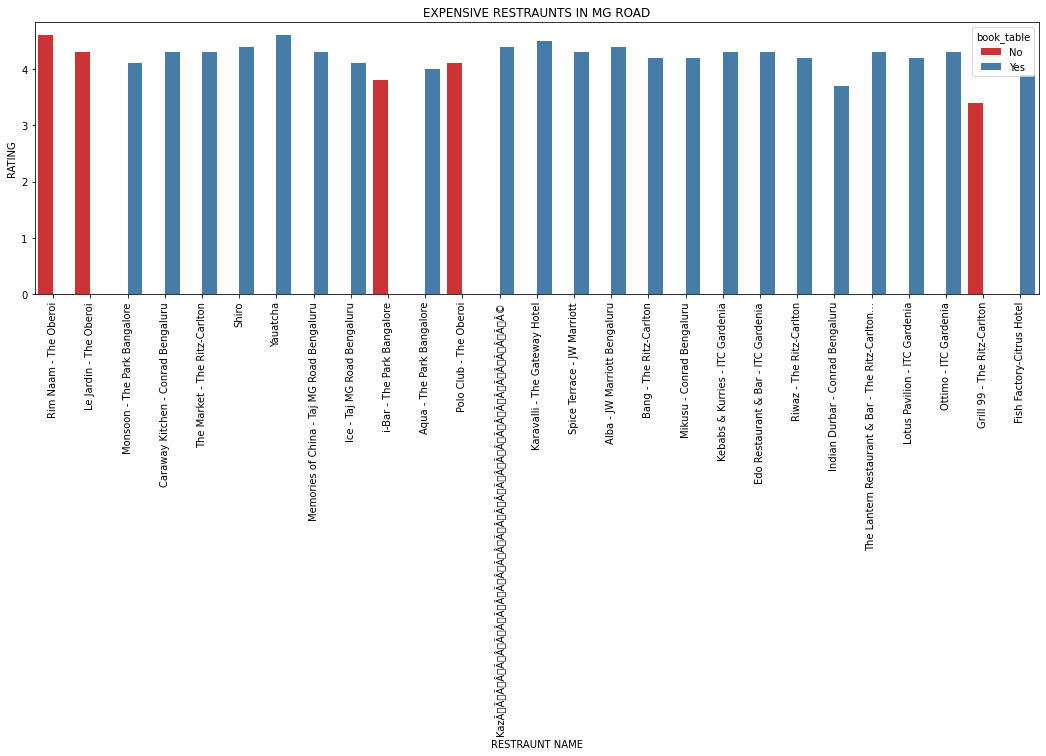

In [67]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
sns.barplot(x=x2['name'],y=x2['rating'],hue=x2['book_table'],ci=None,palette='Set1')
plt.title('EXPENSIVE RESTRAUNTS IN MG ROAD')
plt.xlabel('RESTRAUNT NAME')
plt.ylabel('RATING')

7. Find all the Cafes in 'Whitefield' 

In [68]:
x3=df[(df['listed_in(city)']=='Whitefield') & (df['Rest_Type']=='Cafe')]

Text(0, 0.5, 'APPROX_COST (FOR TWO PERSONS)')

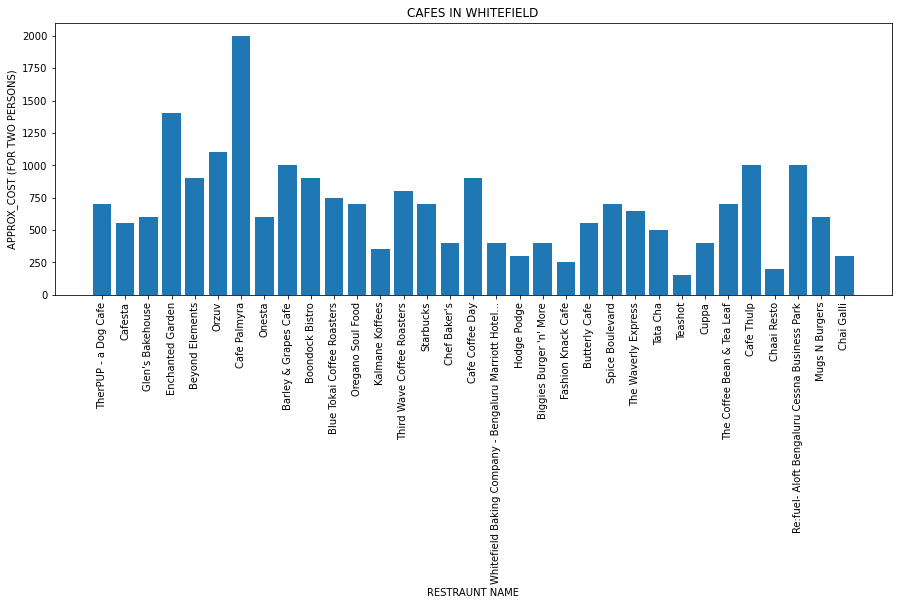

In [69]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(x=x3['name'],height=x3['approx_cost'])
plt.title('CAFES IN WHITEFIELD')
plt.xlabel('RESTRAUNT NAME')
plt.ylabel('APPROX_COST (FOR TWO PERSONS)')

In [70]:
ex=x3['Cuisine'].explode().value_counts()

In [71]:
ex

Cafe            84
Italian         27
Desserts        22
Continental     16
Fast Food       12
Bakery          12
Pizza           12
North Indian    11
Burger           9
Coffee           7
Chinese          6
Beverages        6
Sandwich         6
Salad            6
American         3
Street Food      3
Tea              3
Steak            3
Finger Food      3
Kashmiri         3
Rolls            2
Juices           1
Name: Cuisine, dtype: int64

<AxesSubplot:>

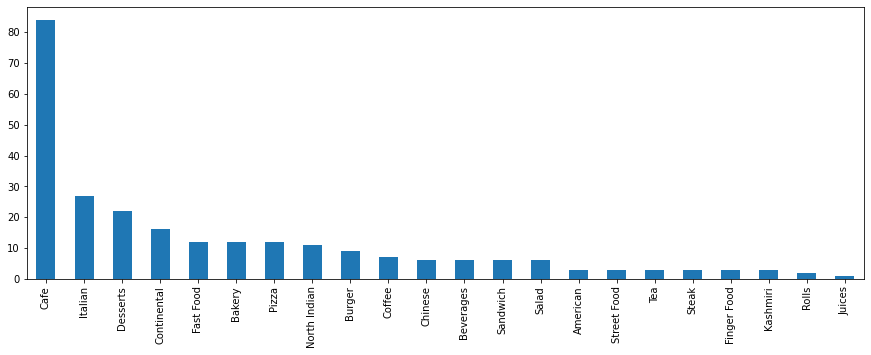

In [72]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
ex.plot(kind='bar')